In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


<Axes: xlabel='cgpa', ylabel='iq'>

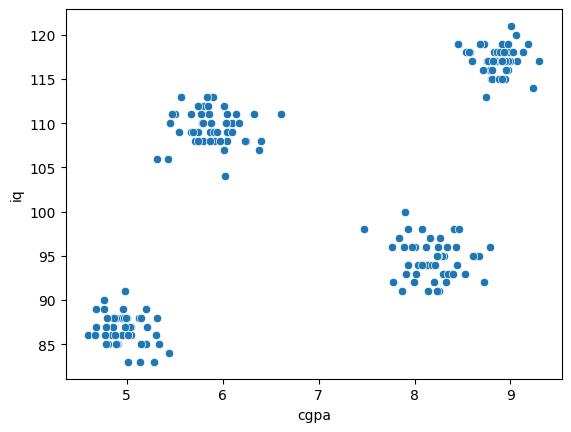

In [6]:
sns.scatterplot(x=df.cgpa,y=df.iq)

In [7]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [13]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1,min_samples=4,metric='euclidean')
db.fit(df)

DBSCAN(eps=1, min_samples=4)

In [14]:
label = db.labels_
label

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int64)

In [15]:
y_pred =db.fit_predict(df)
y_pred

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int64)

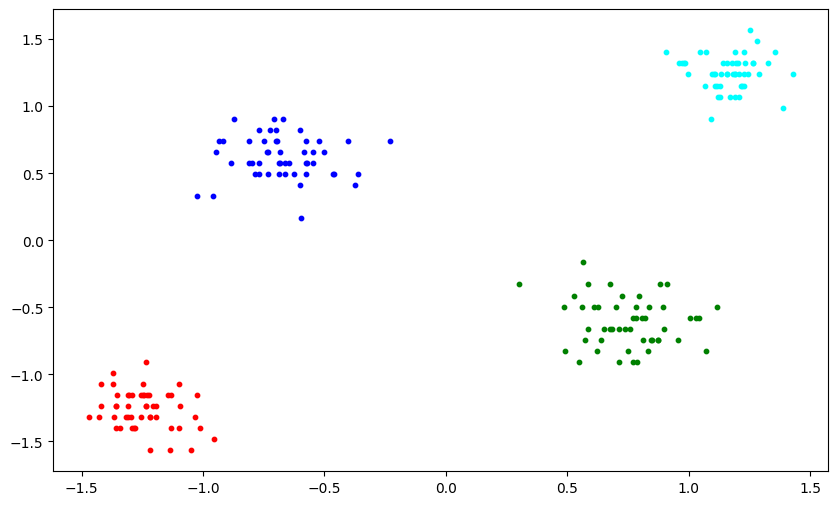

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df[y_pred == 0,0],df[y_pred == 0,1],s=10,c='red',label='Cluster 1')
plt.scatter(df[y_pred == 1,0],df[y_pred == 1,1],s=10,c='blue',label='Cluster 2')
plt.scatter(df[y_pred == 2,0],df[y_pred == 2,1],s=10,c='green',label='Cluster 3')
plt.scatter(df[y_pred == 3,0],df[y_pred == 3,1],s=10,c='cyan',label='Cluster 4')

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit(df)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [21]:
y_pred = kmeans.fit_predict(df)
y_pred

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 3, 2, 2, 3, 3, 2, 0, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 3, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3, 1, 3, 1, 2, 2, 1,
       0, 0, 2, 3, 0, 3, 1, 1, 0, 2, 0, 3, 3, 0, 3, 0, 3, 2, 2, 0, 1, 0,
       2, 1, 3, 2, 3, 0, 2, 1, 3, 0, 3, 0, 1, 2, 2, 0, 3, 1, 0, 1, 0, 3,
       0, 3, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 3, 3, 2, 0, 2, 3, 0, 1, 1, 3, 2, 0, 2, 1, 2, 3, 1, 2, 2, 3,
       1, 1, 3, 0, 3, 1, 2, 2, 2, 1, 3, 1, 1, 0, 1, 0, 3, 1, 0, 1, 0, 0,
       1, 2, 3, 0, 3, 2, 1, 0, 3, 2, 0, 1, 3, 1, 1, 0, 0, 3, 0, 1, 1, 2,
       0, 3, 1, 0, 0, 3, 3, 3, 2, 1, 2, 2, 0, 3, 2, 2, 1, 1, 2, 1, 0, 3,
       3, 0])

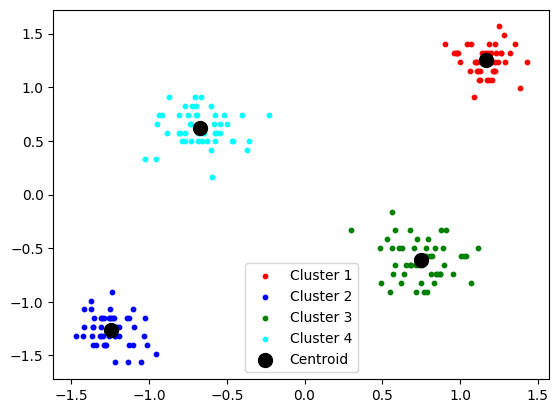

In [25]:
plt.scatter(df[y_pred == 0,0],df[y_pred == 0,1],s=10,c='red',label='Cluster 1')
plt.scatter(df[y_pred == 1,0],df[y_pred == 1,1],s=10,c='blue',label='Cluster 2')
plt.scatter(df[y_pred == 2,0],df[y_pred == 2,1],s=10,c='green',label='Cluster 3')
plt.scatter(df[y_pred == 3,0],df[y_pred == 3,1],s=10,c='cyan',label='Cluster 4')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='k',label='Centroid' )
plt.legend()

In [23]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(df,label)
ss

0.8605024348886897

In [24]:
## More the value of silhouette score more the accurrracy of model